 # EE7204 – Computer vision and Image Processing Take Home Assignment 2 

## Import the Necessary Libraries and Image

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1.Optimum Global Thresholding otsu's class

In [165]:
class otsus_class:
    def _init_(self):
        pass

    def create_image(self):
        # Creates an image with two objects and a background.
        image = np.zeros((150, 150), dtype=np.uint8)
        image[20:70, 20:70] = 1
        image[80:140, 80:140] = 2
        return image

    def add_noise(self, image):
        # Adds Gaussian noise to the given image.
        noise = np.random.normal(0, 0.1, image.shape)
        noisy_image = image.astype(np.float32) + noise
        noisy_image = np.clip(noisy_image, 0, 2).astype(np.uint8)
        return noisy_image

    def apply_otsus_algorithm(self, image):
        # Applies Otsu's thresholding algorithm to the given image.
        _, thresholded_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        return thresholded_image

    def display_images(self, images, titles):
        # Displays the given images with their corresponding titles in a closer array.
        n = len(images)
        fig, axs = plt.subplots(1, n, figsize=(4*n, 4))
        for i in range(n):
            axs[i].imshow(images[i], cmap='gray')
            axs[i].set_title(titles[i])
            axs[i].axis('off')
        plt.show()

## Visualize the Images

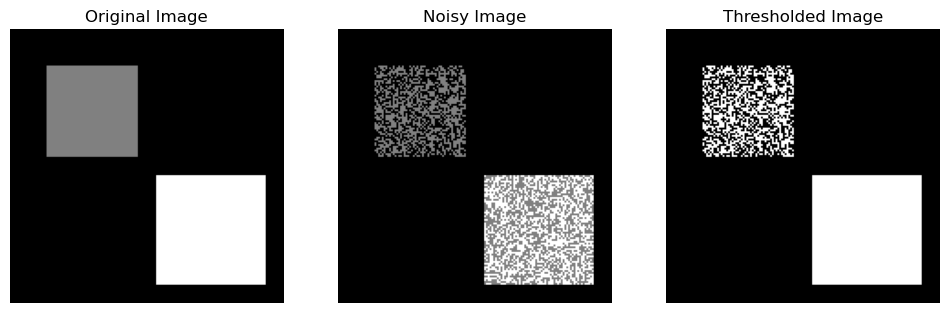

In [171]:
# Create an instance of ImageProcessor
img_processor = ImageProcessor()


# Display all three images together
img_processor.display_images([original_image, noisy_image, thresholded_image],
                             ["Original Image", "Noisy Image", "Thresholded Image"])

## 2.Region growing technique for image segmentation

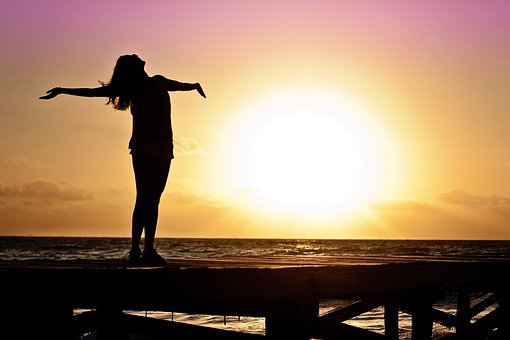

In [137]:
def region_growing(img, seed):
    # Define the range of pixel values for neighboring pixels
    low_threshold = img[seed]
    high_threshold = low_threshold + 20
    
    # Initialize the output image and the list of pixels to be processed
    output_img = np.zeros_like(img)
    output_img[seed] = 255
    pixels_to_process = [seed]
    
    # Process all the pixels in the list
    while len(pixels_to_process) > 0:
        # Get the first pixel to be processed
        current_pixel = pixels_to_process.pop(0)
        
        # Get the neighboring pixels
        neighbors = get_neighbors(current_pixel, img.shape)
        
        # Process all the neighboring pixels
        for neighbor in neighbors:
            # Check if the neighboring pixel is within the threshold range and has not been processed yet
            if (img[neighbor] >= low_threshold).all() and (img[neighbor] <= high_threshold).all() and output_img[neighbor] == 0:
                # Add the neighboring pixel to the output image and the list of pixels to be processed
                output_img[neighbor] = 255
                pixels_to_process.append(neighbor)
    
    return output_img

def get_neighbors(pixel, img_shape):
    # Get the indices of the neighboring pixels
    x, y = pixel
    neighbors = []
    if x > 0:
        neighbors.append((x-1, y))
    if x < img_shape[0]-1:
        neighbors.append((x+1, y))
    if y > 0:
        neighbors.append((x, y-1))
    if y < img_shape[1]-1:
        neighbors.append((x, y+1))
    return neighbors

# Load the image
img = Image.open('woman.jpg')
img

## Visualize the output image

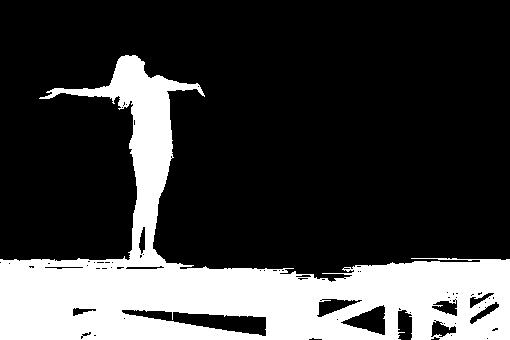

In [166]:
# Load the input image
img = cv2.imread('woman.jpg', cv2.IMREAD_GRAYSCALE)

# Define the seed pixel coordinates
seed = (300, 140)

# Perform the region growing segmentation
output_img = region_growing(img, seed)

# Save the output image
cv2.imwrite('output_image.png', output_img)
img = Image.open('output_image.png')
img

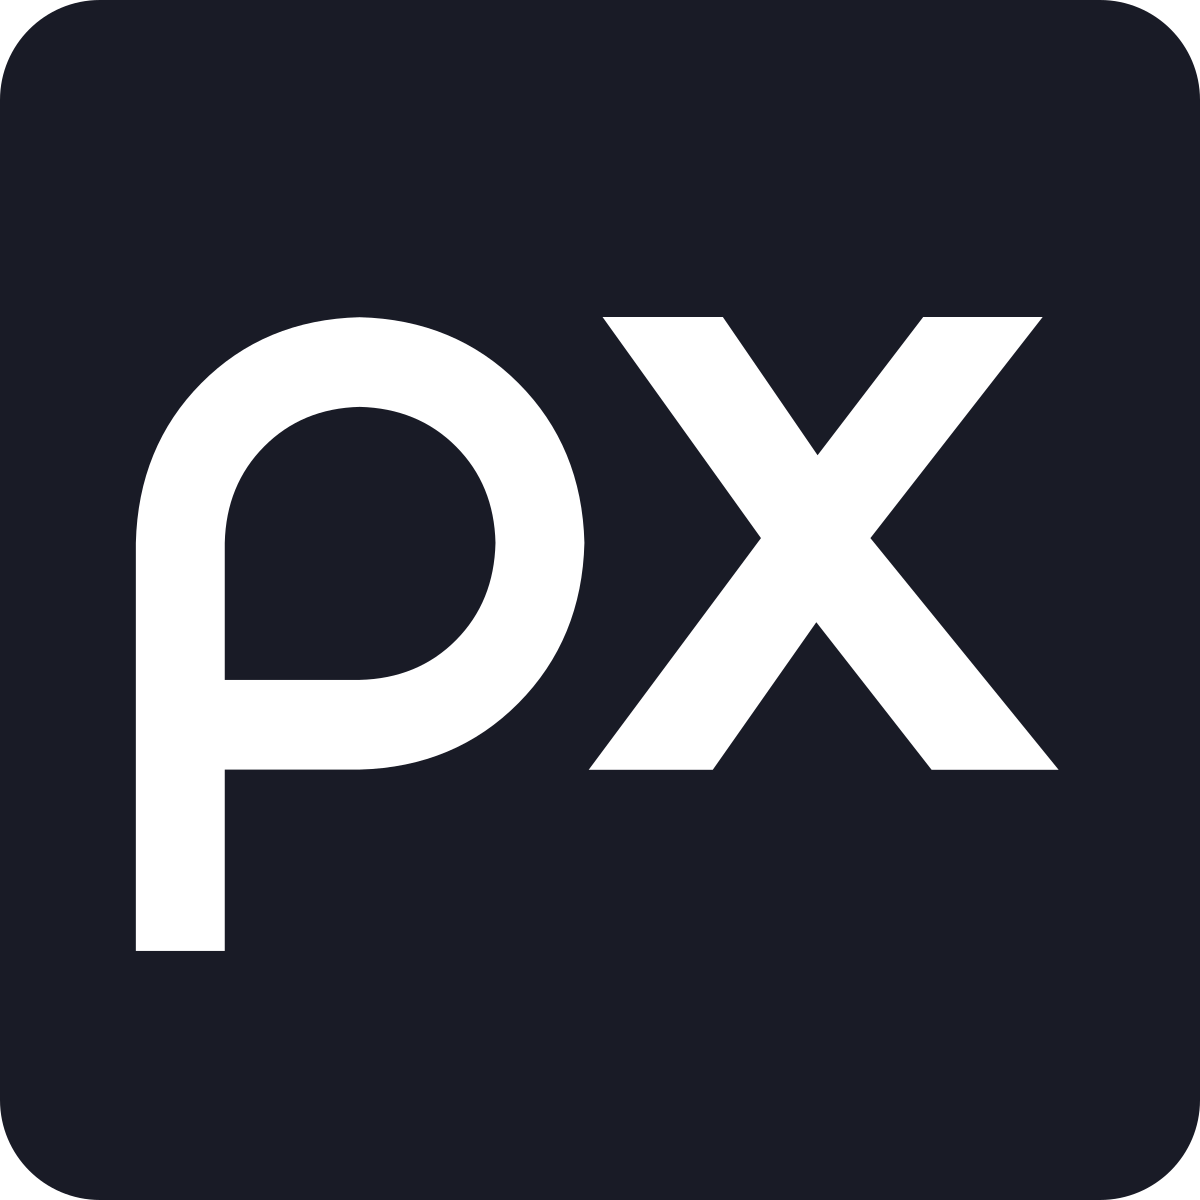

In [169]:
img = Image.open('pixabay.png')
img

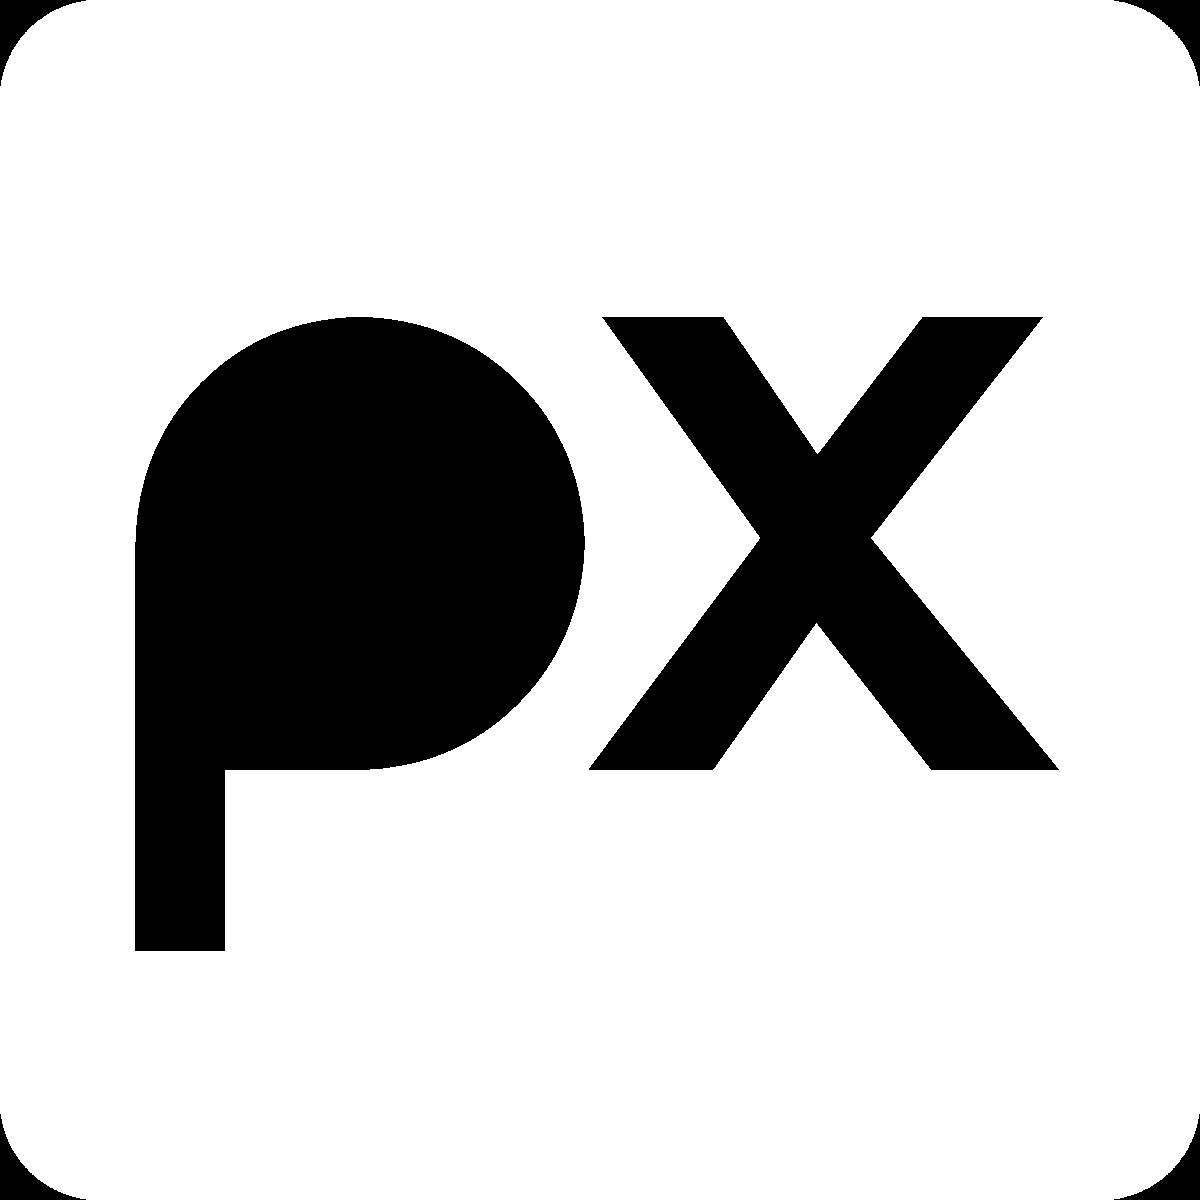

In [170]:

# Load the input image
img = cv2.imread('pixabay.png', cv2.IMREAD_GRAYSCALE)
# Load the image

# Define the seed pixel coordinates
seed = (300, 140)

# Perform the region growing segmentation
output_img = region_growing(img, seed)

# Save the output image
cv2.imwrite('output_image.png', output_img)
img = Image.open('output_image.png')
img